THIS MODEL USES STACKED LONG TERM SHORT MEMORY TO PREDICT FUTURE 10 DAYS PRICES FOR MICROSOFT , THE PREDICTIONS ARE MADE BASED ON THE CLOSING PRICES OF THE PREVIOUS DAYS i.e. USING COLUMN "['close']" , THIS USES PREVOIUS 100 DATA TO PREDICT.

In [87]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

ticker="MSFT"# all the predictions have been done for MICROSOFT.
token="sk_40697a48b07d41efbd1dc85d0f7c270f"
stdata=pd.read_json("https://cloud.iexapis.com/stable/stock/"+ticker+"/chart/1mm?token="+token+'',typ='frame',convert_dates=True)
stdata = pd.DataFrame(stdata)


#print the head
stdata

,date,minute,label,open,high,low,close,average,volume,notional,numberOfTrades,marketOpen,marketHigh,marketLow,marketClose,marketAverage,marketVolume,marketNotional,marketNumberOfTrades
0,2020-09-10,09:30,09:30,213.420,214.55,210.810,212.050,213.013942,59570,1.268925e+07,538,213.40,214.74,210.770,212.125,212.900571,4031864,8.583858e+08,18591
1,2020-09-10,10:00,10:00,212.095,213.19,212.020,212.250,212.706578,29348,6.242515e+06,321,212.14,213.20,211.995,212.090,212.670569,1706480,3.629181e+08,8823
2,2020-09-10,10:30,10:30,212.095,212.83,209.230,209.665,211.405755,21261,4.494700e+06,242,212.06,212.86,209.200,209.735,211.275673,1987265,4.198609e+08,10902
3,2020-09-10,11:00,11:00,209.710,211.30,209.080,211.175,210.235299,15437,3.245405e+06,159,209.74,211.34,209.020,211.206,210.391596,1472282,3.097559e+08,8250
4,2020-09-10,11:30,11:30,211.100,211.54,209.825,210.320,211.014735,62568,1.320278e+07,647,211.15,211.67,209.810,210.220,210.851638,1297901,2.736646e+08,7927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2020-10-09,13:30,13:30,214.610,215.11,214.385,215.090,214.783377,51949,1.115779e+07,450,214.64,215.13,214.380,215.100,214.772572,1094255,2.350161e+08,6135
282,2020-10-09,14:00,14:00,215.090,215.45,214.460,214.610,214.997538,48291,1.038245e+07,504,215.09,215.45,214.460,214.617,214.984186,1191802,2.562186e+08,6002
283,2020-10-09,14:30,14:30,214.670,214.93,214.340,214.740,214.712985,33936,7.286499e+06,341,214.62,214.94,214.350,214.730,214.698161,740133,1.589053e+08,4336
284,2020-10-09,15:00,15:00,214.625,215.48,214.600,215.450,215.065779,55343,1.190239e+07,472,214.71,215.48,214.590,215.450,215.083658,1080461,2.323897e+08,5465


In [88]:

df1= stdata.reset_index()['close']
df1

0      212.050
1      212.250
2      209.665
3      211.175
4      210.320
        ...   
281    215.090
282    214.610
283    214.740
284    215.450
285    215.800
Name: close, Length: 286, dtype: float64

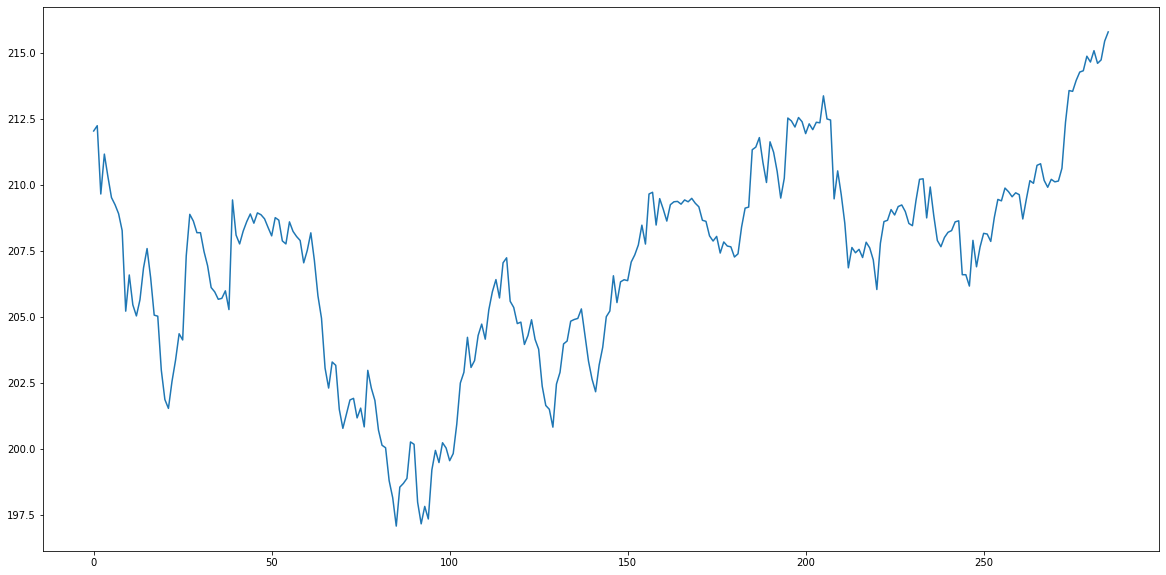

In [89]:

plt.plot(df1)

In [90]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))# LSTM ARE VERY SENSITIVE HENCE SCALING IS NESCCESARY
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # TO FIT THE SCALED DATA
print(df1)

[[0.79951885]
 [0.81021117]
 [0.67201283]
 [0.75273991]
 [0.70703021]
 [0.66479551]
 [0.65036087]
 [0.63218391]
 [0.59796846]
 [0.43491045]
 [0.5081529 ]
 [0.44774125]
 [0.42528736]
 [0.45789896]
 [0.52232024]
 [0.56161454]
 [0.50280674]
 [0.42689121]
 [0.42475274]
 [0.31542368]
 [0.25608126]
 [0.23817161]
 [0.29270249]
 [0.33573911]
 [0.38920075]
 [0.37663726]
 [0.54664528]
 [0.63084737]
 [0.61721465]
 [0.59369153]
 [0.59369153]
 [0.55546645]
 [0.52686447]
 [0.48275862]
 [0.47393745]
 [0.45896819]
 [0.46083935]
 [0.47607592]
 [0.43811815]
 [0.65998396]
 [0.58887998]
 [0.57097033]
 [0.59689922]
 [0.61614542]
 [0.63164929]
 [0.61293772]
 [0.63378776]
 [0.63004544]
 [0.62175889]
 [0.60411655]
 [0.58727613]
 [0.62416466]
 [0.61908581]
 [0.57711842]
 [0.57097033]
 [0.6156108 ]
 [0.59636461]
 [0.58593959]
 [0.57792034]
 [0.53274526]
 [0.55787223]
 [0.59342422]
 [0.5375568 ]
 [0.4659182 ]
 [0.42047581]
 [0.31970061]
 [0.27933708]
 [0.33199679]
 [0.32531409]
 [0.23603315]
 [0.19780807]
 [0.22

In [138]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size,test_data

(185, 101, array([[0.76156108],
        [0.76690724],
        [0.78615343],
        [0.73589949],
        [0.69526864],
        [0.77759957],
        [0.75648222],
        [0.71772253],
        [0.66372628],
        [0.70382251],
        [0.82571505],
        [0.81983427],
        [0.80753809],
        [0.82678428],
        [0.81823042],
        [0.79417268],
        [0.81395349],
        [0.80219193],
        [0.81716119],
        [0.81609195],
        [0.87062283],
        [0.82384389],
        [0.82170543],
        [0.66212243],
        [0.71879177],
        [0.67067629],
        [0.61293772],
        [0.52258754],
        [0.56375301],
        [0.55306068],
        [0.56001069],
        [0.54343758],
        [0.57444534],
        [0.56295108],
        [0.53862604],
        [0.478749  ],
        [0.57230687],
        [0.61614542],
        [0.6188185 ],
        [0.64047046],
        [0.62951083],
        [0.64661855],
        [0.64982625],
        [0.63646084],
        [0.6124031 ],


In [140]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 


In [141]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, 50)

In [142]:

print(X_train.shape), print(y_train.shape)

(84, 100)
(84,)


(None, None)

In [143]:
print(X_test.shape), print(ytest.shape)


(50, 50)
(50,)


(None, None)

In [144]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [145]:
### Creating the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [146]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
# adam optimiztion helps in preventing the gradients getting lost.

In [147]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)# U CAN  SEE THAT THE LOSS KEEPS DECREASING WHICH IS GOOD.

In [158]:
import tensorflow as tf #this helps to prevent a few warnings i was getting in the below two cells , i looked up for the errors and this worked to prevent the warnings, i don't really know why this works :(, but it does.


In [159]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [150]:
##reverse scaling to perform the RMSE calculations
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [151]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))# for the train data

205.30828142281857

In [152]:
math.sqrt(mean_squared_error(ytest,test_predict))# for the test data

209.80847436770077

In [153]:
len(test_data)

101

In [154]:
x_input=test_data[1:].reshape(1,-1)# TO GET PREVOIUS 100 DATA
x_input.shape

(1, 100)

In [155]:
temp_input=list(x_input)# STORING THE DATA IN TEMPERORY ARRAY
temp_input=temp_input[0].tolist()
temp_input

[0.7669072440523923,
 0.7861534349104531,
 0.7358994921144077,
 0.6952686447473937,
 0.7775995723068689,
 0.7564822240042766,
 0.7177225340817976,
 0.6637262763966856,
 0.7038225073509743,
 0.8257150494520182,
 0.8198342689120555,
 0.8075380914194064,
 0.8267842822774654,
 0.8182304196738848,
 0.7941726811013083,
 0.8139534883720927,
 0.8021919272921672,
 0.8171611868484359,
 0.8160919540229887,
 0.8706228281208226,
 0.8238438920074849,
 0.8217054263565888,
 0.6621224271585131,
 0.718791766907243,
 0.6706762897620955,
 0.6129377171879185,
 0.5225875434375844,
 0.5637530072173202,
 0.5530606789628436,
 0.5600106923282535,
 0.5434375835338141,
 0.5744453354717987,
 0.5629510825982358,
 0.5386260358192985,
 0.4787489975942272,
 0.5723068698209044,
 0.6161454156642616,
 0.6188184977278794,
 0.6404704624431972,
 0.6295108259823579,
 0.6466185511895208,
 0.649826249665864,
 0.6364608393477678,
 0.6124031007751949,
 0.6078588612670419,
 0.6589147286821699,
 0.70168404170008,
 0.70275327452552

In [156]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)# OUTPUT DATA IS STORED HERE.

[0.97786355]
101
1 day input [0.78615343 0.73589949 0.69526864 0.77759957 0.75648222 0.71772253
 0.66372628 0.70382251 0.82571505 0.81983427 0.80753809 0.82678428
 0.81823042 0.79417268 0.81395349 0.80219193 0.81716119 0.81609195
 0.87062283 0.82384389 0.82170543 0.66212243 0.71879177 0.67067629
 0.61293772 0.52258754 0.56375301 0.55306068 0.56001069 0.54343758
 0.57444534 0.56295108 0.53862604 0.478749   0.57230687 0.61614542
 0.6188185  0.64047046 0.62951083 0.64661855 0.64982625 0.63646084
 0.6124031  0.60785886 0.65891473 0.70168404 0.70275327 0.62363005
 0.68618017 0.62790698 0.57792034 0.56535686 0.58406843 0.59449345
 0.59796846 0.6156108  0.61774926 0.50868752 0.50868752 0.48569901
 0.57818765 0.52472601 0.56482224 0.59235499 0.59101844 0.57604918
 0.62443197 0.66105319 0.6581128  0.6840417  0.67655707 0.66639936
 0.6744186  0.67067629 0.62149158 0.66158781 0.69901096 0.6936648
 0.73001871 0.73322641 0.69954558 0.68564555 0.70168404 0.69660519
 0.69820904 0.72413793 0.81716119 

In [157]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)# TO PREDICT THE NEXT 30 DAYS ARRANGEMENT IS DONE.

len(df1)


286

Text(0, 0.5, 'PRICE OF STOCK')

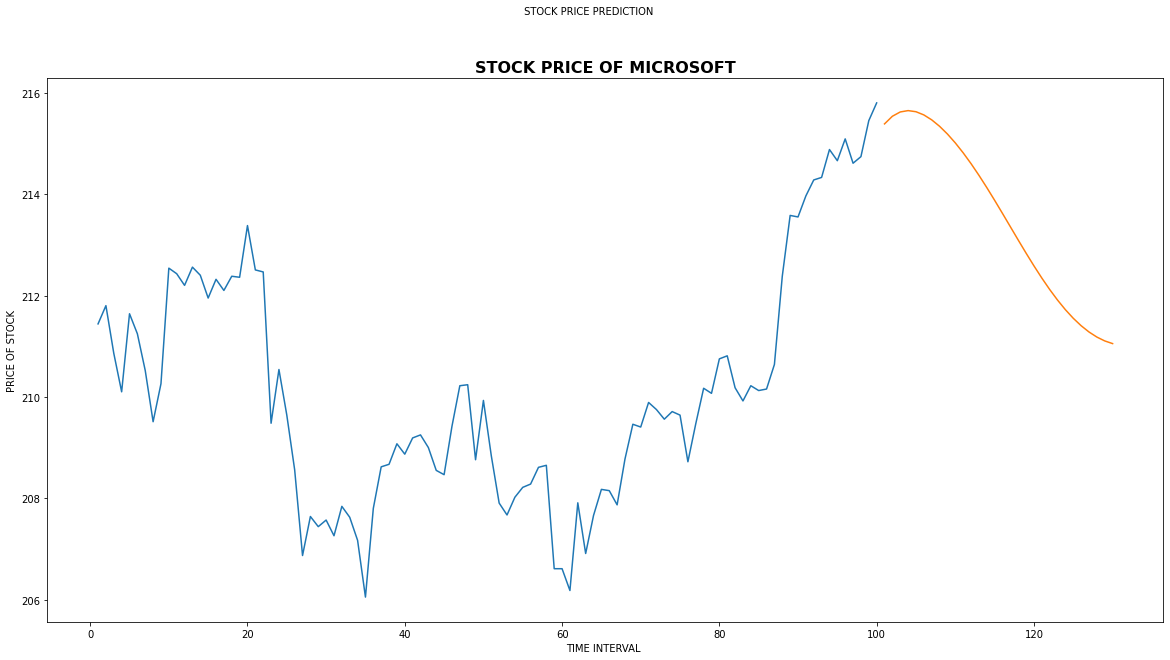

In [168]:
plt.plot(day_new,scaler.inverse_transform(df1[186:])) #slicing through the original dataset
plt.plot(day_pred,scaler.inverse_transform(lst_output))# orange line is the predictionpyplot.plot(X, label="ORIGINAL")

plt.title("STOCK PRICE OF MICROSOFT", fontsize=16, fontweight='bold')
plt.suptitle(" STOCK PRICE PREDICTION", fontsize=10)
plt.xlabel("TIME INTERVAL ")
plt.ylabel("PRICE OF STOCK")

Text(0, 0.5, 'PRICE OF STOCK')

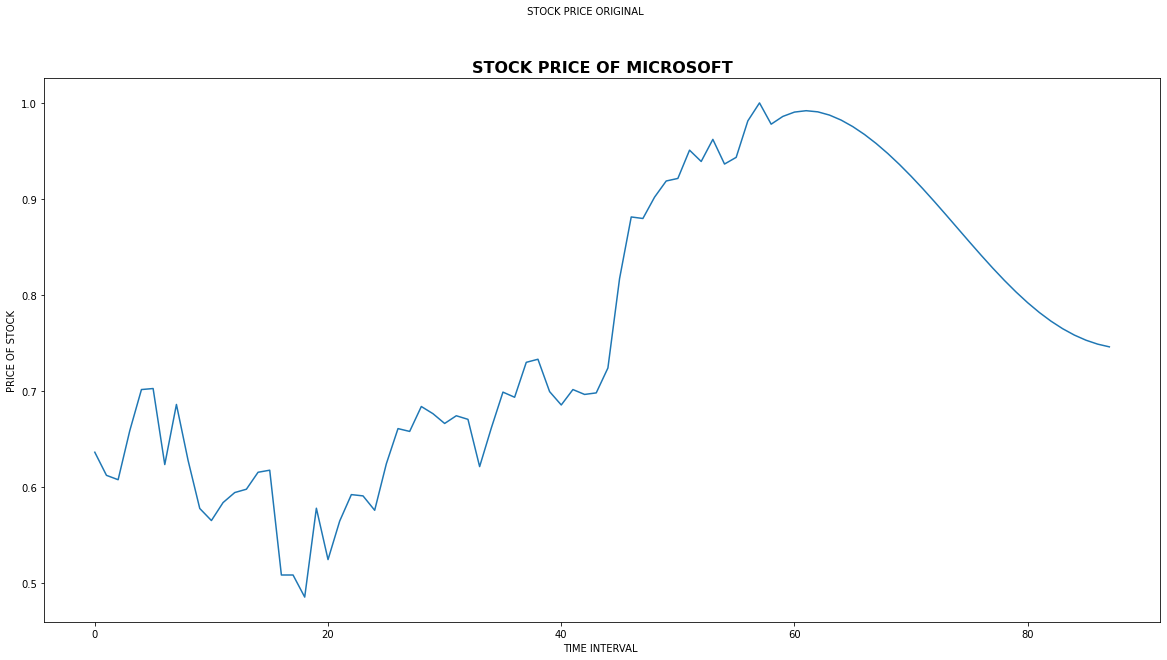

In [170]:
df3=df1.tolist()# to convert df1 to df3 array for original graph
df3.extend(lst_output)
plt.plot(df3[228:])

plt.title("STOCK PRICE OF MICROSOFT", fontsize=16, fontweight='bold')
plt.suptitle(" STOCK PRICE ORIGINAL", fontsize=10)
plt.xlabel("TIME INTERVAL ")
plt.ylabel("PRICE OF STOCK")